# Going on a random walk


 Identifying a random walk process



 Understanding the ACF function



 Classifying differencing, stationarity, and white 
noise



 Using the ACF plot and differencing to identify 
a random walk



 Forecasting a random walk 




n order for this
exercise to be reproducible, we will need to set a seed, which is an integer that we pass
to the random.seed method. That way, no matter how many times we run the code,
the same random numbers will be generated. This ensures that you will obtain the
same results and plot as outlined in this chapter.



Then we must decide on the length of our simulated process. For this exercise, we will
generate 1,000 samples. The numpy library allows us to generate numbers from a nor￾mal distribution by using the standard_normal method. This ensures that the num￾bers come from a distribution with mean of 0, as per the definition of white noise;
I’ve also given it a variance of 1 (a normal distribution). Then we can set the very
first value of our series to 0. Finally, the cumsum method will calculate the cumulative sum of white noise for each timestep in our series, and we will have simulated our ran￾dom walk:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

steps = np.random.standard_normal(1000) # standard_normal is where mean= 0 and std= 1
steps[0]= 0
random_walk = np.cumsum(steps)




We can plot our simulated random walk and see what it looks like. Since our x-axis
and y-axis do not have a real-life meaning, we will simply label them as “timesteps” and
“value,” respectively. 

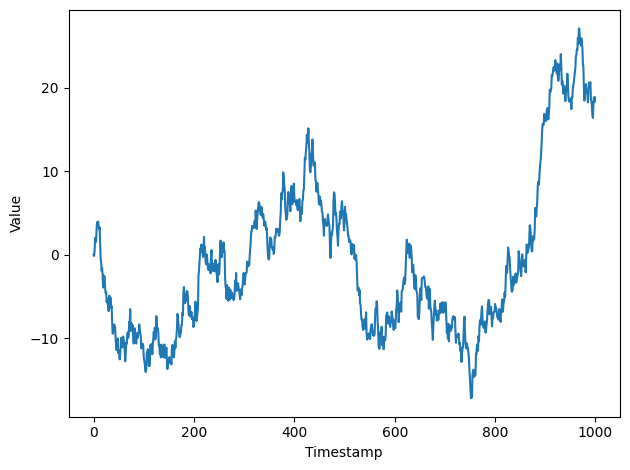

In [5]:
fig, ax = plt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')

plt.tight_layout()

1.  There is an obvious trend: 
    - the first trend is a positive
    - followed by a negative
    - then a sharp positive. 

2. We see, surden changes in price/ value. 


this characterieses a random walk. 


But it is so, because we made it to be so. How do we know that an actual real-life data is a random walk. 



## Identifying a random walk. 

A random walk is a series whose first difference is stationary and uncorrelated hence the processs is completely random

## Stationary

 The first step is to determine whether our random walk is stationary or not. We
know that since there are visible trends in our sequence, it is not stationary. Neverthe￾less, let’s apply the ADF test to make sure. We will use the statsmodels library, which
is a Python library that implements many statistical models and tests. To run the ADF
test, we simply pass it our array of simulated data. The result is a list of different values,
but we are mainly interested in the first two: the ADF statistic and the p-value.


In [9]:
from statsmodels.tsa.stattools import adfuller

ADF_results = adfuller(random_walk)

f'AFD Statisctis:{ADF_results[0]}'


'AFD Statisctis:-0.9659524876918749'

In [10]:
f'p-value: {ADF_results[1]}'

'p-value: 0.7654789696692581'

The statsmodels library conveniently has a function to quickly plot the ACF.
Again, we can simply pass it our array of data. We can optionally specify the number of lags, which will determine the range on the x-axis. In this case, we will plot the first 20
lags, but feel free to plot as many lags as you wish

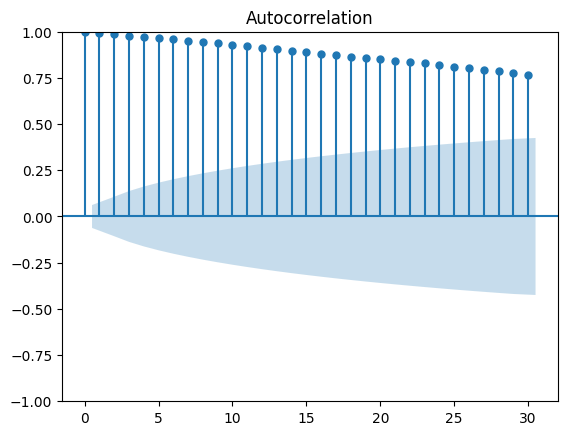

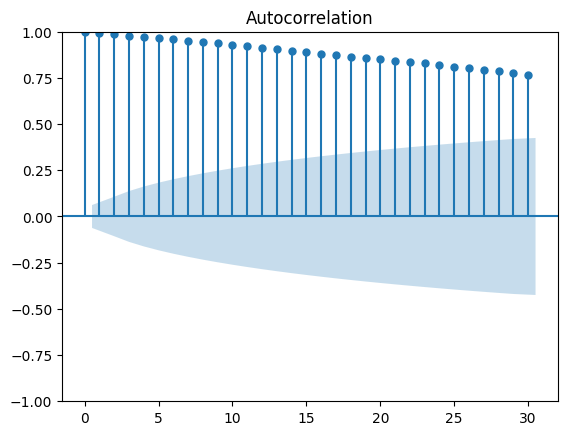

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk)

To difference, we will use the numpy method diff. This will difference a given array
of data. The n parameter controls how many times the array must be differenced. To
apply a first-order differencing, the n parameter must be set to 1:

In [13]:
diff_random_walk = np.diff(random_walk, n=1)

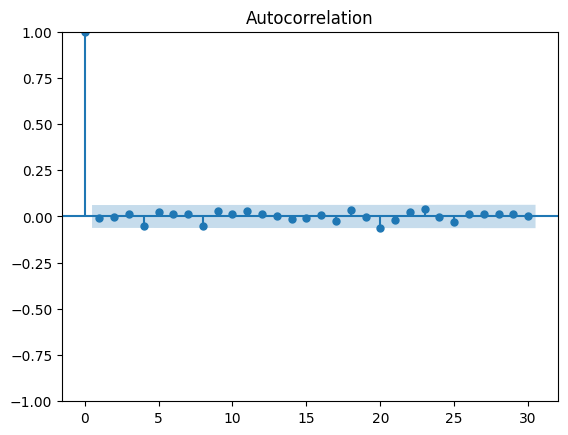

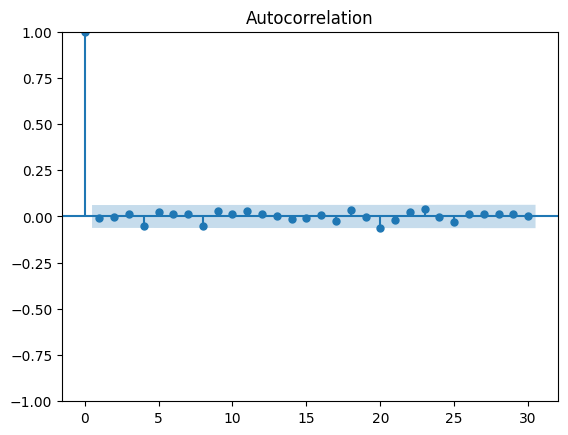

In [14]:
plot_acf(diff_random_walk)

As you can see in figure 3.10, we have removed the trend from our series. Furthermore,
the variance looks quite stable. Let’s test for stationarity again, using the ADF test:


In [15]:
ADF_results = adfuller(diff_random_walk)

f'ADF statistic: {ADF_results[0]}'


'ADF statistic: -31.78931085756059'

In [16]:
f'p-value: {ADF_results[1]}'

'p-value: 0.0'

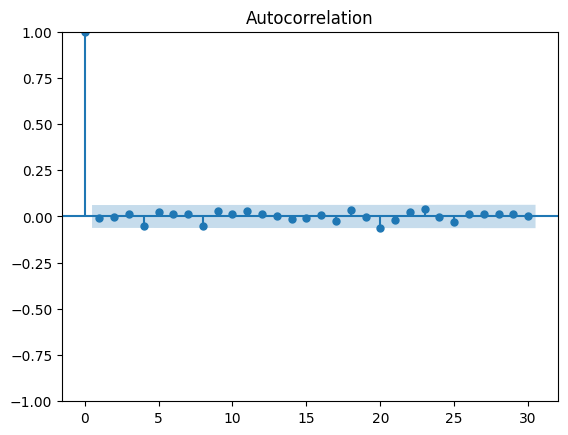

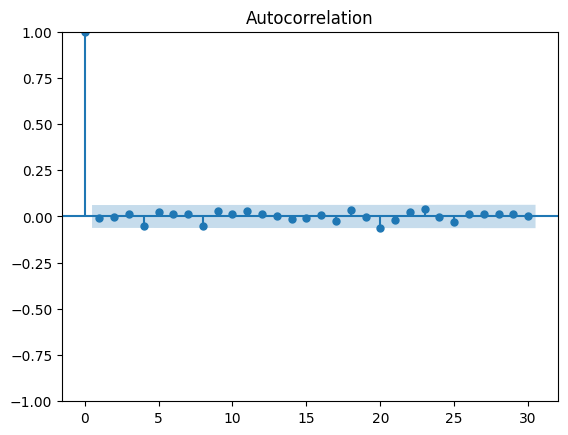

In [21]:
plot_acf(diff_random_walk)


### Is the GOOGL a random walk?



In [25]:
# load data 

import pandas as pd
df = pd.read_csv('GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


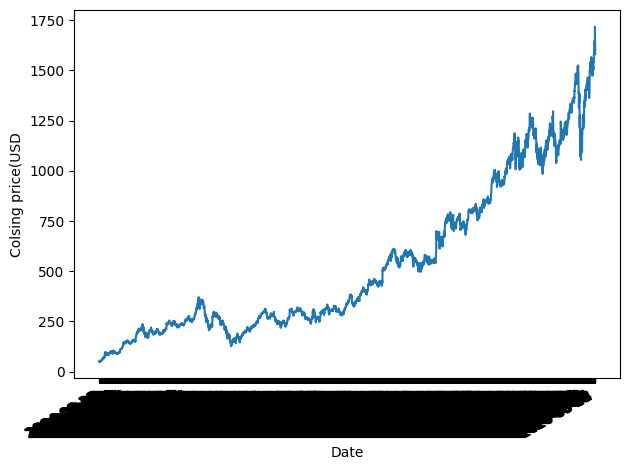

In [26]:
# ploting the closing price

fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Colsing price(USD')

fig.autofmt_xdate()
plt.tight_layout()

In [27]:
GOOGL_ADF_result = adfuller(df['Close'])

print(f'ADF_statistic: {GOOGL_ADF_result[0]}')

ADF_statistic: 0.9838444808180984


This is not at all a big negative number, we can easily say it is not stationary

In [28]:
print(f'p-value: {GOOGL_ADF_result[1]}')

p-value: 0.9940925302936158


wayyyyy greater than 0.05 , still proof of a non-stationary ts

let's perform differenc in of degree 1

In [29]:
diff_close = np.diff(df['Close'], n=1)

In [30]:
# lets see if now it is stationary

GOOGL_diff_ADF = adfuller(diff_close)

f'ADF_statistic: {GOOGL_diff_ADF[0]}'

'ADF_statistic: -12.188137175692184'

Quite a significant negative number there, lets see the p-value

In [32]:
f'p-value:{GOOGL_diff_ADF[1]}'

'p-value:1.3043522692536625e-22'

Much much smaller than the 0.05 threshold

lets plot the acf function

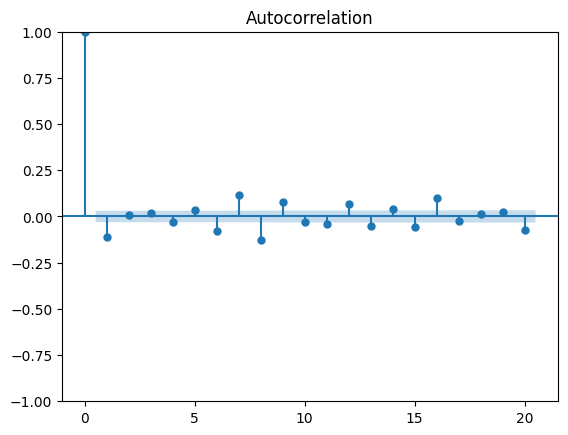

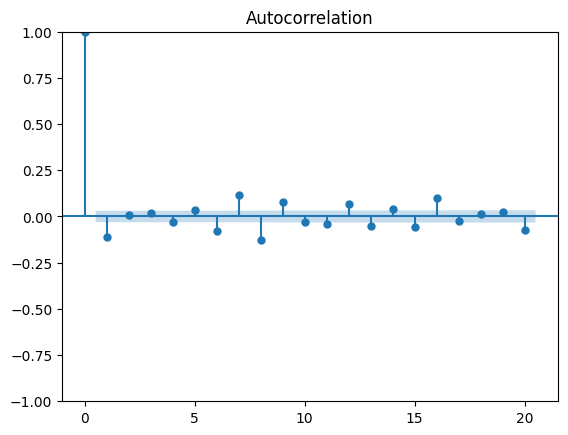

In [33]:
plot_acf(diff_close, lags=20)

Therefore, we can conclude that the closing price of GOOGL can be approximated by
a random walk process. Taking the first difference makes the series stationary, and its
ACF plot shows no autocorrelation, meaning that it is purely random.


## Forecasting a random walk